# Projeto - Análise do Dataset "Wine Quality"

## Sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

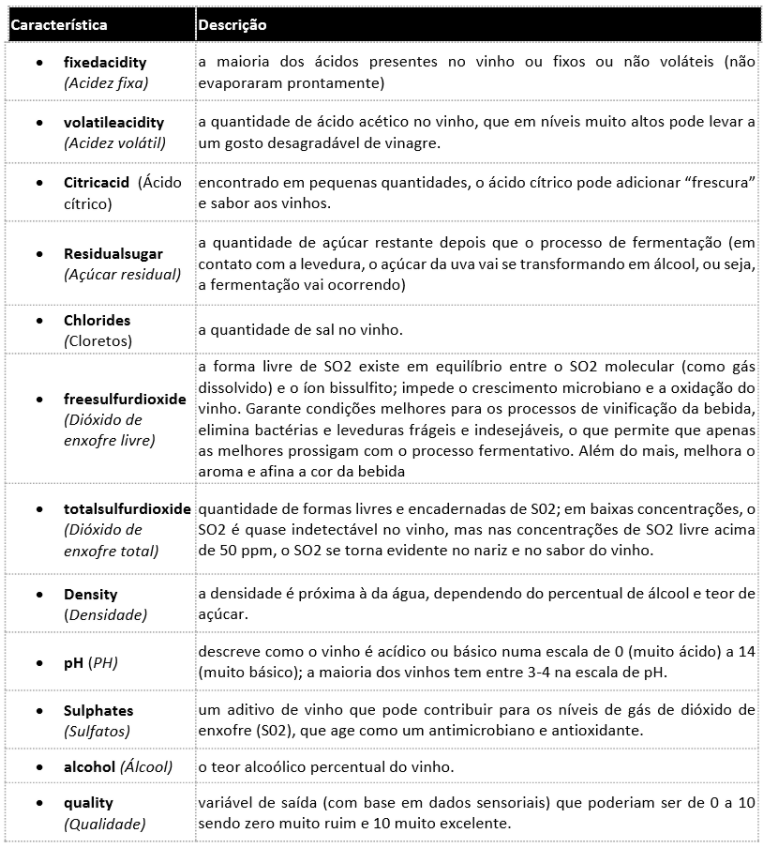

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção);

### Etapa 2

**Regressão Linear**

- Algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Interpretação do resultado;

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade, fiz um algoritmo que classifica os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Interpretação do resultado.

---

# Resolução

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import scipy.stats as st

In [2]:
# Importando 'Datasets' referentes ao Projeto
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [3]:
# Criando 'DataFrame' concatenando os 'Datasets' importados
df = pd.concat([red, white])

# Visualizando 'DataFrame'
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# EDA - Análise e Exploração de Dados

### Informações numéricas e visuais (gráficas) referentes às 'features' e 'target' presentes no 'Dataset'

In [4]:
# Informações das 'features' referentes ao 'DataFrame'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [5]:
# Calculando as medidas de posição e dispersão do DataFrame Wine Quality (df)
# Criando um DataFrame com a maioria das medidas utilizando o 'describe'
df_medidas = df.describe()

# Efetuando o cálculo das demais medidas, incluindo as mesmas no DataFrame
# Moda
df_medidas.loc['mode'] = df.mode().loc[0]

# IQR
df_medidas.loc['IQR'] = df.quantile(0.75) - df.quantile(0.25)

# Limite Superior
lim_sup = df.quantile(0.75) + (1.5 * (df.quantile(0.75) - df.quantile(0.25)))
df_calc_ls = pd.concat([lim_sup, df.max()], axis=1)
df_calc_ls['ls_menor_max'] = df_calc_ls[0] < df_calc_ls[1]
df_calc_ls.loc[ df_calc_ls['ls_menor_max'] == True, 'upper limit' ] = df_calc_ls[0]
df_calc_ls.loc[ df_calc_ls['ls_menor_max'] == False, 'upper limit' ] = df_calc_ls[1]
df_medidas.loc['upper limit'] = df_calc_ls['upper limit']

# Limite Inferior
lim_inf = df.quantile(0.25) - (1.5 * (df.quantile(0.75) - df.quantile(0.25)))
df_calc_li = pd.concat([lim_inf, df.min()], axis=1)
df_calc_li['li_maior_min'] = df_calc_li[0] > df_calc_li[1]
df_calc_li.loc[ df_calc_li['li_maior_min'] == True, 'lower limit' ] = df_calc_li[0]
df_calc_li.loc[ df_calc_li['li_maior_min'] == False, 'lower limit' ] = df_calc_li[1]
df_medidas.loc['lower limit'] = df_calc_li['lower limit']

# Amplitude e Assimetria
df_medidas.loc['extend'] = df.max() - df.min()
df_medidas.loc['asymmetry (skewness)'] = df.skew()

# Visualizando as medidas de posição e dispersão do Dataset 'df' (Wine Quality)
df_medidas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000
mode,6.800000,0.280000,0.300000,2.000000,0.044000,29.000000,111.000000,0.997200,3.160000,0.500000,9.500000,6.000000
IQR,1.300000,0.170000,0.140000,6.300000,0.027000,24.000000,79.000000,0.004650,0.210000,0.170000,1.800000,1.000000


In [6]:
# Percentual de cada nota (valor) na 'feature' 'quality'
df['quality'].value_counts(normalize=True) * 100

6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

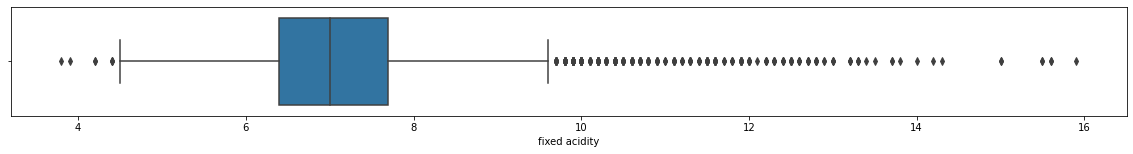

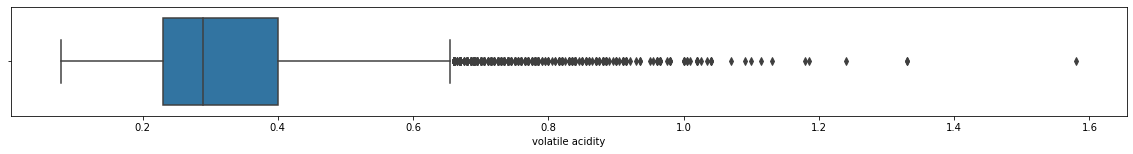

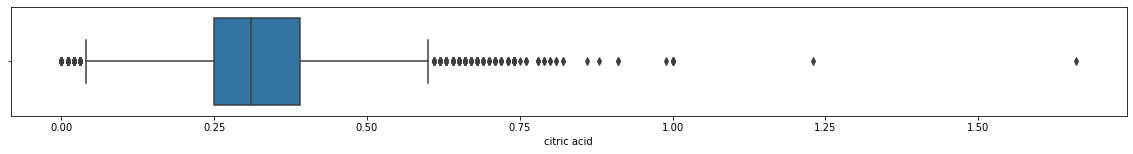

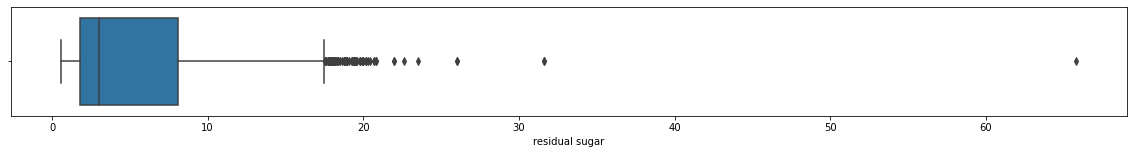

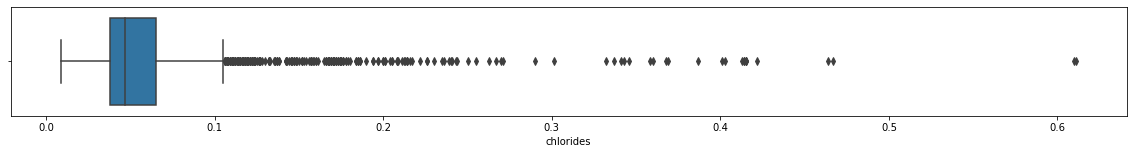

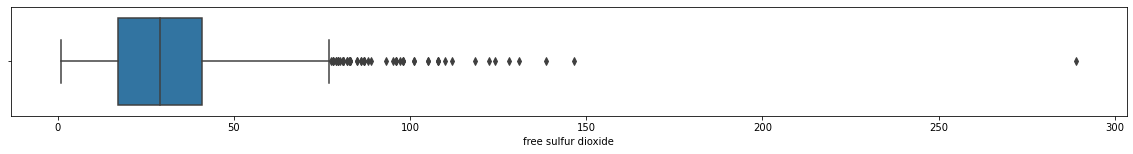

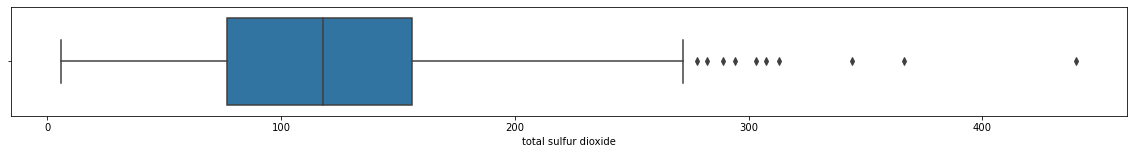

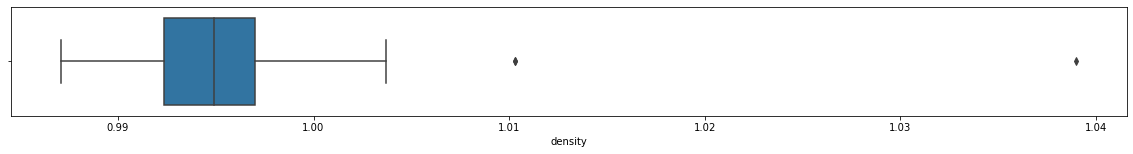

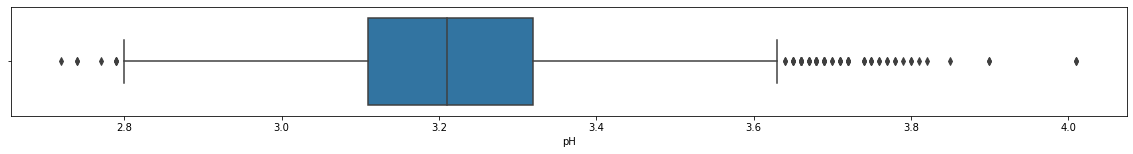

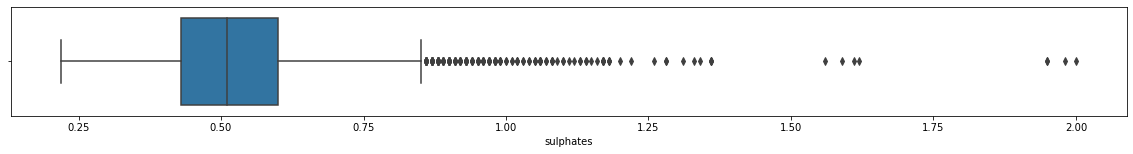

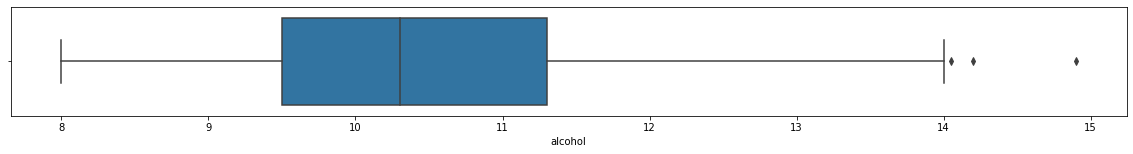

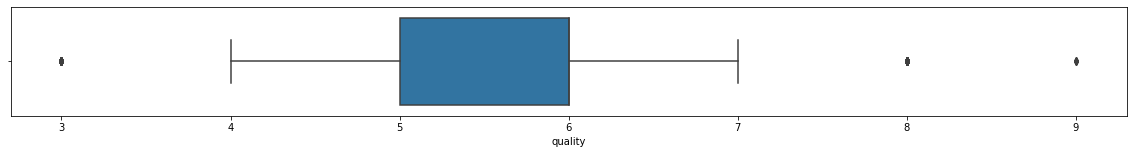

In [7]:
# Visualizando distribuição dos dados de cada 'feature' e do 'target' com o gráfico 'boxplot'
# Criando gráfico com cada 'feature' e 'target'
for feature in df.columns:
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=df, x=feature)

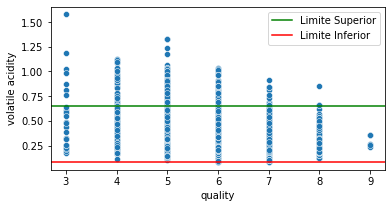

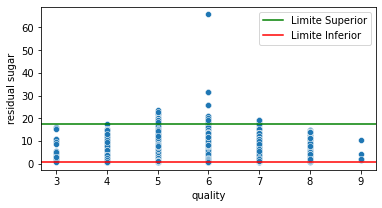

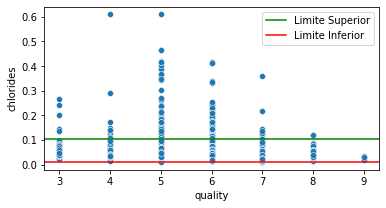

In [8]:
# Visualizando graficamente as 'features' que possuem 'outliers' que são mais relevantes, ou seja, que interferem em suas médias em relação as medianas
# Lista com as 'features'
features_outliers = ['volatile acidity', 'residual sugar', 'chlorides']

# Criando gráfico com cada 'features'
for feature in features_outliers:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(data=df, x='quality', y=feature)
    plt.axhline(df_medidas.loc['upper limit', feature], color='green', label='Limite Superior')
    plt.axhline(df_medidas.loc['lower limit', feature], color='red', label='Limite Inferior')
    plt.legend()

### Tratando os 'Outliers'

### Tratativa: remover os 'outliers' que interferem no valor da média em relação à mediana das 'features'.

In [9]:
# Efetuando a remoção dos outliers das 'features' necessárias
# Lista com as 'features' que serão removidos os seus outliers
features_outliers = ['volatile acidity', 'residual sugar', 'chlorides']

# Criando uma cópia do 'DataFrame' inicial, onde serão tratados os registros com as 'features' da lista acima
df_sem_outliers = df.copy()

# Loop para remover os registros que possuem valores 'outliers' de cada 'feature' identificada com outliers relevantes
for feature in features_outliers:
    df_sem_outliers = df_sem_outliers.loc[ df_sem_outliers[feature] <= df_medidas.loc['upper limit', feature] ]
    df_sem_outliers = df_sem_outliers.loc[ df_sem_outliers[feature] >= df_medidas.loc['lower limit', feature] ]

# Visualizando novo 'DataFrame' sem 'outliers' relevantes
df_sem_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


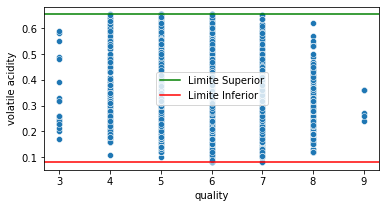

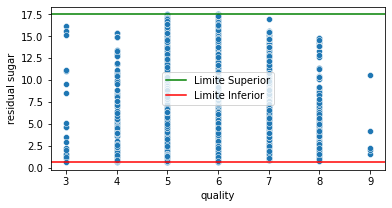

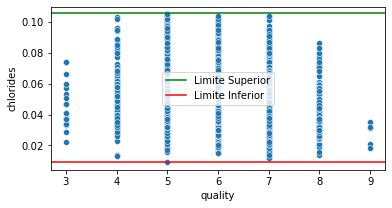

In [10]:
# Visualizando resultados das 'Features' sem outliers com gráfico scatterplot
# Lista com as 'features'
features_outliers = ['volatile acidity', 'residual sugar', 'chlorides']

# Criando gráfico com cada 'features'
for feature in features_outliers:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(data=df_sem_outliers, x='quality', y=feature)
    plt.axhline(df_medidas.loc['upper limit', feature], color='green', label='Limite Superior')
    plt.axhline(df_medidas.loc['lower limit', feature], color='red', label='Limite Inferior')
    plt.legend(loc='center')

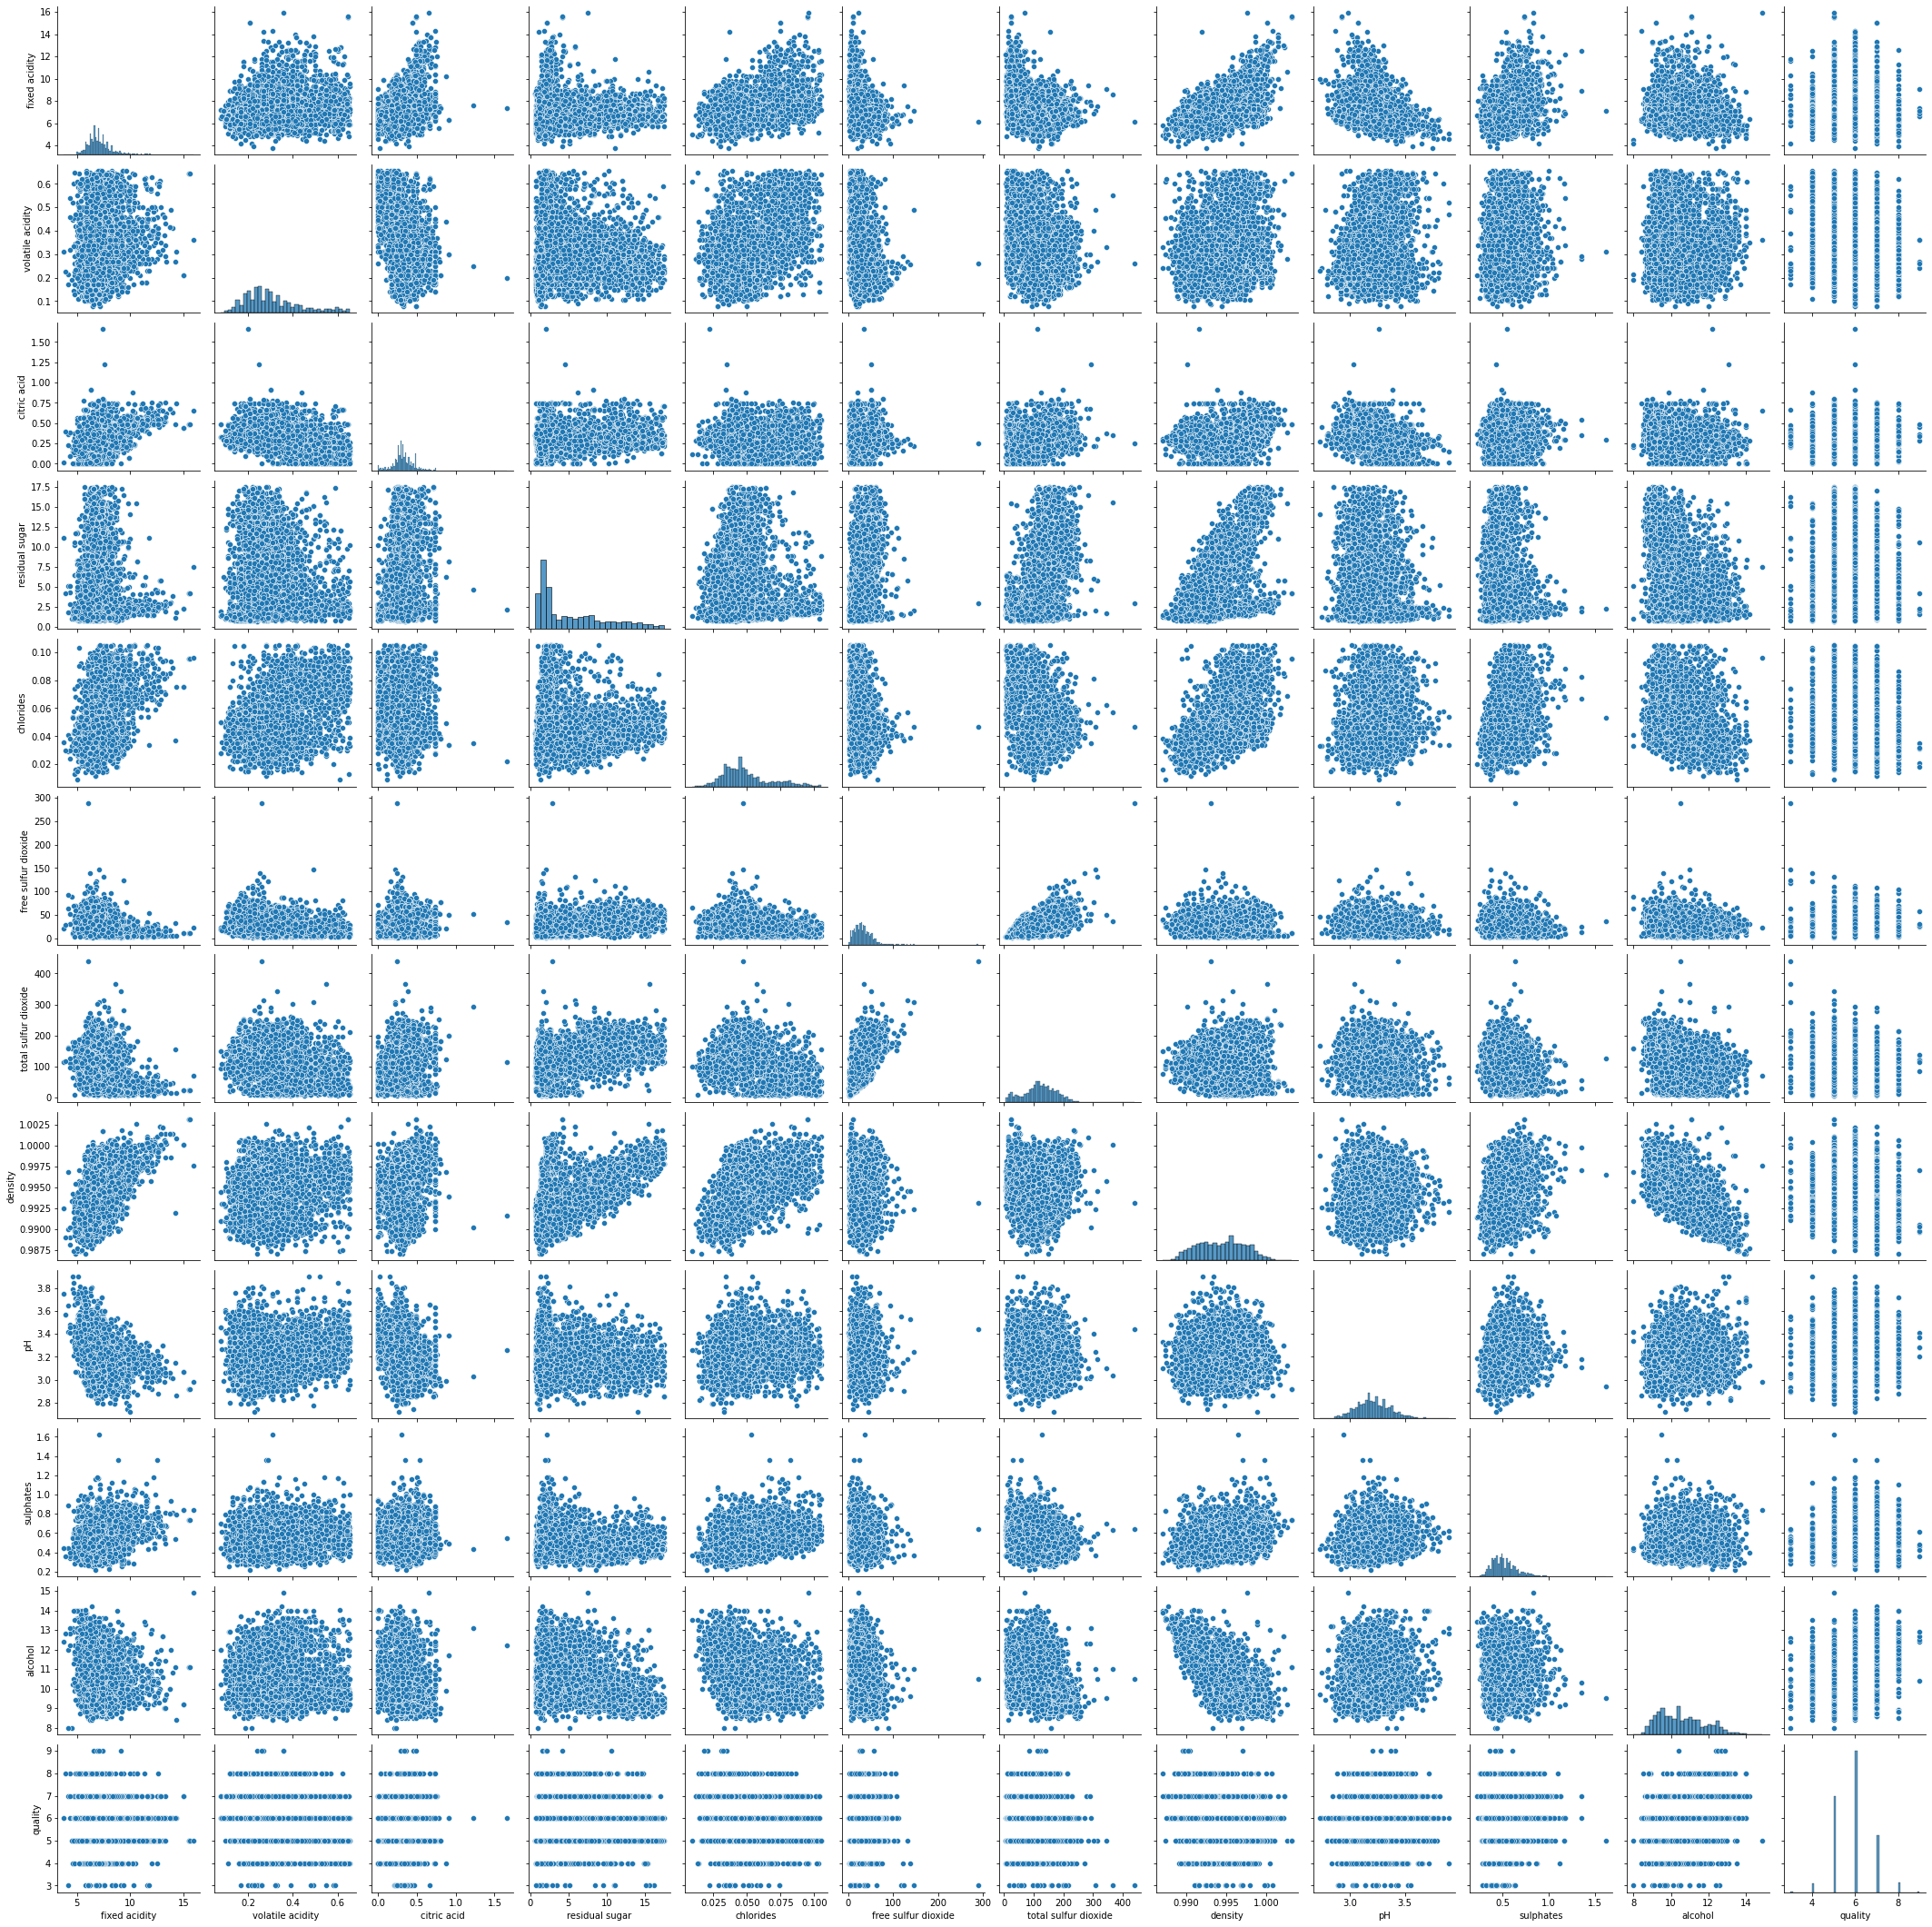

In [11]:
# Visualizando gráficos de distribuição e dispersão para análise univariada e multivariada
sns.pairplot(df_sem_outliers)
plt.show()

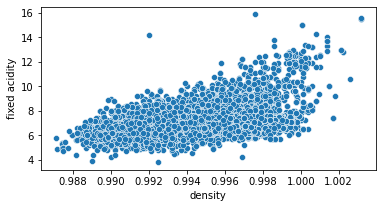

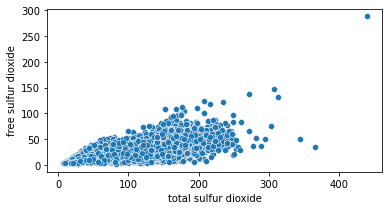

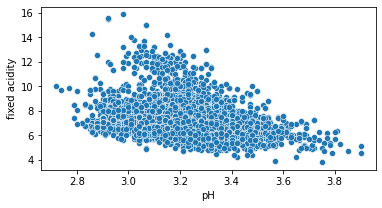

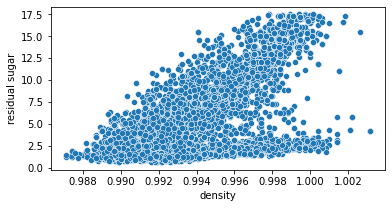

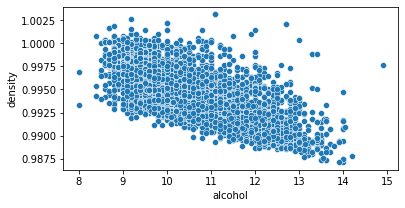

In [12]:
# Visualizando melhor algumas análises de correlações obtidas na figura gráfica anterior ('pairplot')
# Lista com os pares de 'features' para criar os gráficos 'scatterplot'
features_table = [['density', 'fixed acidity'], ['total sulfur dioxide', 'free sulfur dioxide'], ['pH', 'fixed acidity'], ['density', 'residual sugar'], ['alcohol', 'density']]

# Criando gráfico com cada par de 'features'
for features in features_table:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(data=df_sem_outliers, x=features[0], y=features[1])

<AxesSubplot:>

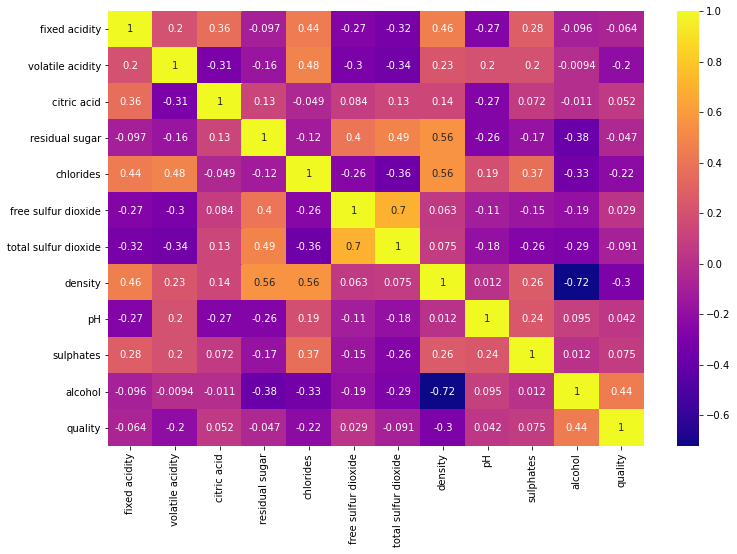

In [13]:
# Todas as correlações de maneira numérica com o gráfico mapa de calor 'heatmap'
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_sem_outliers.corr(), annot=True, cmap='plasma')

---

# Modelo de Regressão Linear Múltipla

## Criação do Modelo

In [14]:
# Criando um modelo inicial de Regressão Múltipla, apenas para verificar quais são as 'features' mais relevantes para o modelo final
# Importando bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Normalizando os dados para padronizar os valores do 'Dataset' e melhorar a eficiência do modelo
# Criando objeto 'StandardScaler' para padronizar as escalas dos valores
scaler = StandardScaler()

# Treinando a padronização dos valores
scaler.fit(df_sem_outliers.drop(columns='quality'))

# Variáveis 'X' (features) e 'y' (target) para a criação do modelo
X = scaler.transform(df_sem_outliers.drop(columns='quality'))
y = df_sem_outliers['quality']

# Criando variáveis de 'treino' e 'teste' para o modelo
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)

# Instanciando o modelo (criando o objeto LinearRegression)
modelo_rl_mult = LinearRegression()

# Treinando o modelo de regressão com os dados amostrais obtidos no 'train_test_split'
modelo_rl_mult.fit(X_train, y_train)

# Testando o modelo de regressão treinado
y_predicao = modelo_rl_mult.predict(X_test)

# Criando 'DataFrame' e 'Series' para concatenar as 'features' de 'X_test' e os valores das predições na visualização do resultado referente ao modelo
valores_Xtest = pd.DataFrame(X_test, columns=df_sem_outliers.drop(columns='quality').columns, index=y_test.index)
valores_pred = pd.Series(y_predicao, name='quality_predict', index=y_test.index)

# Criando 'DataFrame' para comparar valores reais com predições do modelo
df_result_modelo = pd.concat([valores_Xtest, y_test, valores_pred], axis=1)

# Visualizando os resultados referentes ao modelo de regressão para o 'Dataset' Wine Quality
print("Target: Resultados reais (quality) x Resultados previstos no modelo (quality_predict)\n")
df_result_modelo

Target: Resultados reais (quality) x Resultados previstos no modelo (quality_predict)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_predict
1079,0.582683,-0.079802,2.683632,0.652181,0.027613,0.346549,2.913068,-0.433801,-1.299265,-0.096443,1.460058,7,6.090047
591,0.111249,-0.893971,0.341459,-0.944696,-0.702991,0.943647,-0.013494,-0.836195,0.666840,-0.242437,0.289757,6,6.193811
599,4.354148,2.281290,0.945891,-0.697293,1.826023,-1.160414,-1.798880,1.938936,-1.362688,1.290491,-1.047731,6,5.191949
3114,-0.674473,-1.138222,-0.036311,-0.269959,-0.534390,0.318116,-0.050306,-0.898636,0.159458,-0.680416,0.624128,6,6.287555
1458,-0.045895,-0.731137,3.136956,-0.607328,-0.309589,0.602448,0.446658,-1.183087,0.603417,-0.826409,1.376465,6,6.414017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,-0.517328,0.652951,0.190351,-0.854731,-0.028587,-1.217280,0.814779,0.259982,0.857108,-0.096443,-0.713359,5,5.075470
4589,-1.381622,-0.161219,0.417013,-0.944696,-1.152593,-0.023084,0.225785,-1.894214,0.413149,-1.191392,1.543651,6,6.250999
1677,0.111249,-0.649720,0.341459,-0.809749,-0.983992,1.626045,0.667530,-0.836195,-0.665038,-1.264388,0.456942,6,5.955607
876,-0.203039,0.408700,0.114797,-0.269959,-1.770796,1.455446,-0.013494,-1.599356,0.413149,-1.191392,1.794430,9,6.638992


In [15]:
# Criando 'DataFrame' referente as pontuações de cada 'feature' no modelo inicial
# Transformando variável 'X_train' em um 'DataFrame' para trabalhar com as suas colunas
valores_Xtrain = pd.DataFrame(X_train, columns=df_sem_outliers.drop(columns='quality').columns, index=y_train.index)

# Variável com os coeficientes angulares obtidos no modelo inicial
coefs = modelo_rl_mult.coef_

# Criando listas para armazenar resultados obtidos no 'loop' e criar dicionário
list_columns = valores_Xtrain.columns
list_feature = []
list_score = []

# Loop para armazenar 'features' e seus coeficientes
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

# Criando dicionário para armazenar valores das listas de 'features' e 'scores'
dicionario = {'Features': list_feature,
              'Scores': list_score}

# Criando 'DataFrame' utilizando o dicionário
df_features = pd.DataFrame(dicionario)

# Organizando 'DataFrame' com os 'scores' em ordem decrescente e reorganizando o index
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)

# Visualizando o 'DataFrame' com os 'scores'
df_features

,Features,Scores
0,alcohol,0.304988
1,residual sugar,0.247832
2,sulphates,0.119374
3,fixed acidity,0.100346
4,pH,0.097373
5,free sulfur dioxide,0.096404
6,chlorides,-0.001649
7,citric acid,-0.017005
8,total sulfur dioxide,-0.140652
9,volatile acidity,-0.169560


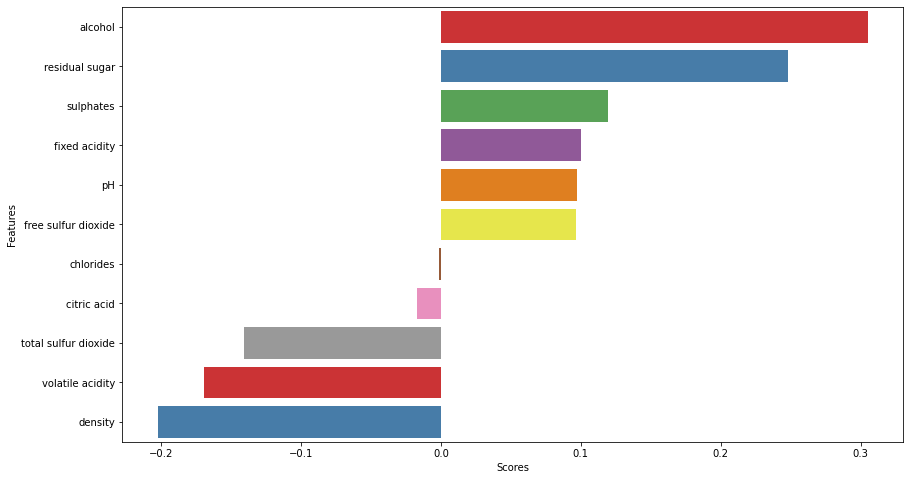

In [16]:
# Criando gráfico de barras para visualização gráfica dos valores referentes ao 'DataFrame' com os 'scores'
plt.figure(figsize=(14,8))
sns.barplot(x='Scores', y='Features', data=df_features, palette='Set1')
plt.show()

In [17]:
# Criando o modelo final de Regressão Linear Múltipla com as 'features' mais relevantes

# Variáveis 'X' (features) e 'y' (target) para a criação do modelo
X = df_sem_outliers[['residual sugar', 'alcohol', 'sulphates', 'density', 'volatile acidity', 'total sulfur dioxide']]
y = df_sem_outliers['quality']

# Importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Criando variáveis de 'treino' e 'teste' para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)

# Instanciando o modelo (criando o objeto LinearRegression)
modelo_rl_mult = LinearRegression()

# Treinando o modelo de regressão com os dados amostrais obtidos no 'train_test_split'
modelo_rl_mult.fit(X_train, y_train)

# Testando o modelo de regressão treinado
y_predicao = modelo_rl_mult.predict(X_test)

# Criando 'Series' para os resultados das predições
valores_pred = pd.Series(y_predicao, name='quality_predict', index=y_test.index)

# Criando 'DataFrame' para comparar valores reais com predições do modelo
df_result_modelo = pd.concat([X_test, y_test, valores_pred], axis=1)

# Visualizando resultado referente ao modelo de regressão múltipla para o 'Dataset' Wine Quality
print("Target: Resultados reais (quality) x Resultados previstos no modelo (quality_predict)\n")
df_result_modelo

Target: Resultados reais (quality) x Resultados previstos no modelo (quality_predict)



,residual sugar,alcohol,sulphates,density,volatile acidity,total sulfur dioxide,quality,quality_predict
1079,8.3,12.3,0.51,0.99316,0.30,278.0,7,6.356680
591,1.2,10.9,0.49,0.99200,0.20,119.0,6,6.019949
599,2.3,9.3,0.70,1.00000,0.59,22.0,6,5.146011
3114,4.2,11.3,0.43,0.99182,0.17,117.0,6,6.255154
1458,2.7,12.2,0.41,0.99100,0.22,144.0,6,6.376814
...,...,...,...,...,...,...,...,...
2233,1.6,9.7,0.51,0.99516,0.39,164.0,5,5.268629
4589,1.2,12.4,0.36,0.98895,0.29,132.0,6,6.289989
1677,1.8,11.1,0.35,0.99200,0.23,156.0,6,5.891105
876,4.2,12.7,0.36,0.98980,0.36,119.0,9,6.393716


In [18]:
# Visualizando resultado do modelo com os valores de 'erro' para cada registro
df_result_modelo['erro'] = df_result_modelo['quality_predict'] - df_result_modelo['quality']
df_result_modelo

,residual sugar,alcohol,sulphates,density,volatile acidity,total sulfur dioxide,quality,quality_predict,erro
1079,8.3,12.3,0.51,0.99316,0.30,278.0,7,6.356680,-0.643320
591,1.2,10.9,0.49,0.99200,0.20,119.0,6,6.019949,0.019949
599,2.3,9.3,0.70,1.00000,0.59,22.0,6,5.146011,-0.853989
3114,4.2,11.3,0.43,0.99182,0.17,117.0,6,6.255154,0.255154
1458,2.7,12.2,0.41,0.99100,0.22,144.0,6,6.376814,0.376814
...,...,...,...,...,...,...,...,...,...
2233,1.6,9.7,0.51,0.99516,0.39,164.0,5,5.268629,0.268629
4589,1.2,12.4,0.36,0.98895,0.29,132.0,6,6.289989,0.289989
1677,1.8,11.1,0.35,0.99200,0.23,156.0,6,5.891105,-0.108895
876,4.2,12.7,0.36,0.98980,0.36,119.0,9,6.393716,-2.606284


## Avaliação do Modelo

In [19]:
# Importando biblioteca
from sklearn.metrics import r2_score

# Efetuando a avaliação do modelo regressivo com o r2 ('R' quadrado)
r2_score(y_test, y_predicao)

0.2759986663741588

In [20]:
# Avaliação da precisão do modelo em relação ao vinho ser bom ou ruim

print('Relatório de precisão do modelo para Avaliação dos vinhos (vinho maior ou igual a 6 = bom ou vinho menor que 6 = ruim):\n')
# Notas abaixo de 6
notas_abaixo6 = [3, 4, 5]
for nota in notas_abaixo6:
    nota_real = df_result_modelo['quality'].loc[ df_result_modelo['quality'] == nota ].count()
    nota_pred = df_result_modelo['quality'].loc[ (df_result_modelo['quality'] == nota) & (df_result_modelo['quality_predict'] < 6) ].count()
    print(f'Percentual nota {nota}: {(nota_pred / nota_real) * 100}')

# Notas iguais ou acima de 6
notas_acima6 = [6, 7, 8, 9]
for nota in notas_acima6:
    nota_real = df_result_modelo['quality'].loc[ df_result_modelo['quality'] == nota ].count()
    nota_pred = df_result_modelo['quality'].loc[ (df_result_modelo['quality'] == nota) & (df_result_modelo['quality_predict'] >= 6) ].count()
    print(f'Percentual nota {nota}: {(nota_pred / nota_real) * 100}')

Relatório de precisão do modelo para Avaliação dos vinhos (vinho maior ou igual a 6 = bom ou vinho menor que 6 = ruim):

Percentual nota 3: 75.0
Percentual nota 4: 83.33333333333334
Percentual nota 5: 86.46288209606988
Percentual nota 6: 45.07042253521127
Percentual nota 7: 75.79365079365078
Percentual nota 8: 73.91304347826086
Percentual nota 9: 100.0


**Considerações:**  
- Devido a baixa correlação entre as 'features' em relação à variável 'target', tivemos dificuldades de obter um alto valor de pontuação na avaliação de R2;
- Apesar do resultado baixo do R2, este é um dos melhores modelos possíveis de desenvolver com os dados disponíveis no 'Dataset', pois as 'features' utilizadas são resultados conquistados com os 'scores' de cada 'feature' calculados através dos seus coeficientes angulares;
- Com as informações fornecidas pelo cálculo de 'score', desenvolvemos esse modelo que, se por um lado não oferece uma alta acurácia no R2, por outro lado disponibiliza um bom desempenho na avaliação dos vinhos, considerando uma availiação de vinhos bons ou ruins, já pensando em um futuro modelo de regressão Logística (conforme o nosso *'Relatório de precisão do modelo para Avaliação dos vinhos'*).

---

# Modelo de Regressão Logística

## Criação do Modelo

In [21]:
# Criando o modelo de Regressão Logística para avaliar os vinhos como Bom ou Ruim
# Importando as bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Variáveis 'X' (features) e 'y' (target) para a criação do modelo
X = df_sem_outliers[['residual sugar', 'alcohol', 'sulphates', 'density', 'volatile acidity', 'total sulfur dioxide']]
y = df_sem_outliers['quality']

# Criando variáveis de 'treino' e 'teste' para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)

# Instanciando a classe do modelo (criando o objeto LogisticRegression)
# modelo_rlog = LogisticRegression()
modelo_rlog = LogisticRegression(max_iter = 7000)

# Treinando o modelo de regressão com os dados amostrais obtidos no 'train_test_split'
modelo_rlog.fit(X_train, y_train)

# Testando o modelo de regressão logística treinado
y_predicao = modelo_rlog.predict(X_test)

# Transformando os valores de 'y_test' e y_predicao' em apenas dois resultados de avaliação dos vinhos (Bom = 1, Ruim = 0)
y_test = pd.Series(y_test).where(pd.Series(y_test) < 6, 1)
y_test = y_test.where(y_test == 1, 0)
y_predicao = pd.Series(y_predicao, index=y_test.index).where(pd.Series(y_predicao, index=y_test.index) < 6, 1)
y_predicao = y_predicao.where(y_predicao == 1, 0)

# Criando 'Series' para informar a avaliação dos vinhos
# Avaliação variável 'y_test'
avaliac_test = pd.Series(y_test, name='rating').where(pd.Series(y_test) == 0, 'Bom')
avaliac_test = avaliac_test.where(avaliac_test == 'Bom', 'Ruim')

# Avaliação variável 'y_predicao'
avaliac_pred = pd.Series(y_predicao, name='rating_predict', index=y_test.index).where(pd.Series(y_predicao, index=y_test.index) == 0, 'Bom')
avaliac_pred = avaliac_pred.where(avaliac_pred == 'Bom', 'Ruim')

# Criando 'DataFrame' para comparar valores reais com predições do modelo
df_result_modelo = pd.concat([X_test, avaliac_test, avaliac_pred], axis=1)

# Visualizando resultado referente ao modelo de regressão logística para o 'Dataset' Wine Quality
print("Target: Resultados reais (rating) x Resultados previstos no modelo (rating_predict)\n")
df_result_modelo

Target: Resultados reais (rating) x Resultados previstos no modelo (rating_predict)



,residual sugar,alcohol,sulphates,density,volatile acidity,total sulfur dioxide,rating,rating_predict
1079,8.3,12.3,0.51,0.99316,0.30,278.0,Bom,Bom
591,1.2,10.9,0.49,0.99200,0.20,119.0,Bom,Bom
599,2.3,9.3,0.70,1.00000,0.59,22.0,Bom,Ruim
3114,4.2,11.3,0.43,0.99182,0.17,117.0,Bom,Bom
1458,2.7,12.2,0.41,0.99100,0.22,144.0,Bom,Bom
...,...,...,...,...,...,...,...,...
2233,1.6,9.7,0.51,0.99516,0.39,164.0,Ruim,Ruim
4589,1.2,12.4,0.36,0.98895,0.29,132.0,Bom,Bom
1677,1.8,11.1,0.35,0.99200,0.23,156.0,Bom,Bom
876,4.2,12.7,0.36,0.98980,0.36,119.0,Bom,Bom


## Avaliação do Modelo

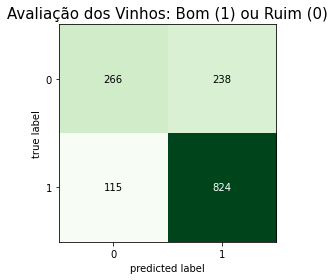

In [22]:
# Calculando a 'Matriz de confusão' e criando o gráfico da mesma
# Importando bibliotecas
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Variável com os valores da 'Matriz de confusão' calculados
matriz_conf = confusion_matrix(y_test, y_predicao)

# Gráfico apresentando os resultados da Matriz de confusão
plot_confusion_matrix(conf_mat=matriz_conf, cmap='Greens')
plt.title('Avaliação dos Vinhos: Bom (1) ou Ruim (0)', fontdict={'fontsize': 15})
plt.show()

In [23]:
# Métricas de Avaliação do modelo de regressão logística
# Importando biblioteca
from sklearn.metrics import classification_report

# Exibindo valores referentes as métricas de avaliação
print('Métricas de Avaliação - Modelo de Regressão Logística\n')
print(classification_report(y_test, y_predicao))

Métricas de Avaliação - Modelo de Regressão Logística

              precision    recall  f1-score   support

           0       0.70      0.53      0.60       504
           1       0.78      0.88      0.82       939

    accuracy                           0.76      1443
   macro avg       0.74      0.70      0.71      1443
weighted avg       0.75      0.76      0.75      1443



## Criação do Modelo (com a 'Normalização' dos Dados)

In [24]:
# Criando o modelo de Regressão Logística para avaliar os vinhos como Bom ou Ruim, com a normalização dos dados das 'features'
# Importando bibliotecas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Normalizando os dados para padronizar os valores do 'Dataset' e melhorar a eficiência do modelo
# Criando objeto 'StandardScaler' para padronizar as escalas dos valores
scaler = StandardScaler()

# Treinando a padronização dos valores
scaler.fit(df_sem_outliers[['residual sugar', 'alcohol', 'sulphates', 'density', 'volatile acidity', 'total sulfur dioxide']])

# Variáveis 'X' (features) e 'y' (target) para a criação do modelo
X = scaler.transform(df_sem_outliers[['residual sugar', 'alcohol', 'sulphates', 'density', 'volatile acidity', 'total sulfur dioxide']])
y = df_sem_outliers['quality']

# Criando variáveis de 'treino' e 'teste' para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=81)

# Instanciando a classe do modelo (criando o objeto LogisticRegression)
modelo_rlog = LogisticRegression(max_iter = 1000)

# Treinando o modelo de regressão com os dados amostrais obtidos no 'train_test_split'
modelo_rlog.fit(X_train, y_train)

# Testando o modelo de regressão logística treinado
y_predicao = modelo_rlog.predict(X_test)

# Transformando os valores de 'y_test' e y_predicao' em apenas dois resultados de avaliação dos vinhos (Bom = 1, Ruim = 0)
y_test = pd.Series(y_test).where(pd.Series(y_test) < 6, 1)
y_test = y_test.where(y_test == 1, 0)
y_predicao = pd.Series(y_predicao, index=y_test.index).where(pd.Series(y_predicao, index=y_test.index) < 6, 1)
y_predicao = y_predicao.where(y_predicao == 1, 0)

# Criando 'Series' para informar a avaliação dos vinhos
# Avaliação variável 'y_test'
avaliac_test = pd.Series(y_test, name='rating').where(pd.Series(y_test) == 0, 'Bom')
avaliac_test = avaliac_test.where(avaliac_test == 'Bom', 'Ruim')

# Avaliação variável 'y_predicao'
avaliac_pred = pd.Series(y_predicao, name='rating_predict', index=y_test.index).where(pd.Series(y_predicao, index=y_test.index) == 0, 'Bom')
avaliac_pred = avaliac_pred.where(avaliac_pred == 'Bom', 'Ruim')

# Criando 'DataFrame' para concatenar as 'features' de 'X_test' na visualização do resultado referente ao modelo
valores_Xteste = pd.DataFrame(X_test, columns=['residual sugar', 'alcohol', 'sulphates', 'density', 'volatile acidity', 'total sulfur dioxide'], index=y_test.index)

# Criando 'DataFrame' para comparar valores reais com predições do modelo
df_result_modelo = pd.concat([valores_Xteste, avaliac_test, avaliac_pred], axis=1)

# Visualizando resultado referente ao modelo de regressão logística para o 'Dataset' Wine Quality
print("Target: Resultados reais (rating) x Resultados previstos no modelo (rating_predict)\n")
df_result_modelo

Target: Resultados reais (rating) x Resultados previstos no modelo (rating_predict)



,residual sugar,alcohol,sulphates,density,volatile acidity,total sulfur dioxide,rating,rating_predict
1079,0.652181,1.460058,-0.096443,-0.433801,-0.079802,2.913068,Bom,Bom
591,-0.944696,0.289757,-0.242437,-0.836195,-0.893971,-0.013494,Bom,Bom
599,-0.697293,-1.047731,1.290491,1.938936,2.281290,-1.798880,Bom,Ruim
3114,-0.269959,0.624128,-0.680416,-0.898636,-1.138222,-0.050306,Bom,Bom
1458,-0.607328,1.376465,-0.826409,-1.183087,-0.731137,0.446658,Bom,Bom
...,...,...,...,...,...,...,...,...
2233,-0.854731,-0.713359,-0.096443,0.259982,0.652951,0.814779,Ruim,Ruim
4589,-0.944696,1.543651,-1.191392,-1.894214,-0.161219,0.225785,Bom,Bom
1677,-0.809749,0.456942,-1.264388,-0.836195,-0.649720,0.667530,Bom,Bom
876,-0.269959,1.794430,-1.191392,-1.599356,0.408700,-0.013494,Bom,Bom


## Avaliação do Modelo (com a 'Normalização' dos Dados)

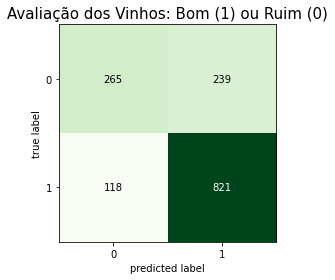

In [25]:
# Calculando a 'Matriz de confusão' e criando o gráfico da mesma (modelo com valores 'normalizados')
# Importando bibliotecas
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Variável com os valores da 'Matriz de confusão' calculados
matriz_conf = confusion_matrix(y_test, y_predicao)

# Gráfico apresentando os resultados da Matriz de confusão
plot_confusion_matrix(conf_mat=matriz_conf, cmap='Greens')
plt.title('Avaliação dos Vinhos: Bom (1) ou Ruim (0)', fontdict={'fontsize': 15})
plt.show()

In [26]:
# Métricas de Avaliação do modelo de regressão logística (modelo com valores 'normalizados')
# Importando biblioteca
from sklearn.metrics import classification_report

# Exibindo valores referentes as métricas de avaliação
print('Métricas de Avaliação - Modelo de Regressão Logística\n')
print(classification_report(y_test, y_predicao))

Métricas de Avaliação - Modelo de Regressão Logística

              precision    recall  f1-score   support

           0       0.69      0.53      0.60       504
           1       0.77      0.87      0.82       939

    accuracy                           0.75      1443
   macro avg       0.73      0.70      0.71      1443
weighted avg       0.75      0.75      0.74      1443



*OBS: O modelo com a ***Normalização dos Dados*** executa com mais rapidez, utilizando uma ***quantidade menor de iterações***. Os resultados obtidos nos dois modelos são muito semelhantes, com uma diferença mínima de 0,01 pontos na ***acurácia***, ***precisão*** e ***recall***.*

**Considerações:**  
- Mesmo com a baixa correlação entre as 'features' e o 'target' do 'Dataset', foi possível obter um bom resultado de acurária (75%) no modelo de Regressão Logística na avaliação dos vinhos como 'Bom' ou 'Ruim';
- Nosso modelo demonstrou uma maior precisão nas avaliações dos vinhos bons (824/1062 = 77,59%) em relação às avaliações dos vinhos ruins (266/381 = 69,8%);
- Este modelo se mostrou um modelo eficiente, alcançando resultados satisfatórios de acordo com os dados e correlações entre os mesmos disponíveis.